Name: Tasnia Rahman


Here in the below data set you will implement the Regression Models can be written in Python and how to find the Slope and Coefficients of the given data.
Dataset link: https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?select=Real+estate.csv


a. Import the required Libraries

b. Reading our Dataset.

c. Visualizing the Data using HeatMap

d. Check the correlations in the dataset

e. Make features

f. Train test splitting

g. Generating the model and train regression model  

h. Check Coefficients, Intercept, R-Squared Value

I. Evaluate the model and give a proper view of performance


----------------------------------------------------------------------

Here all individual question and there ans ---->

a. Import the required Libraries

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


b. Reading our Dataset.

In [22]:
df = pd.read_csv("/content/Real estate.csv")
df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


c. Visualizing the Data using HeatMap

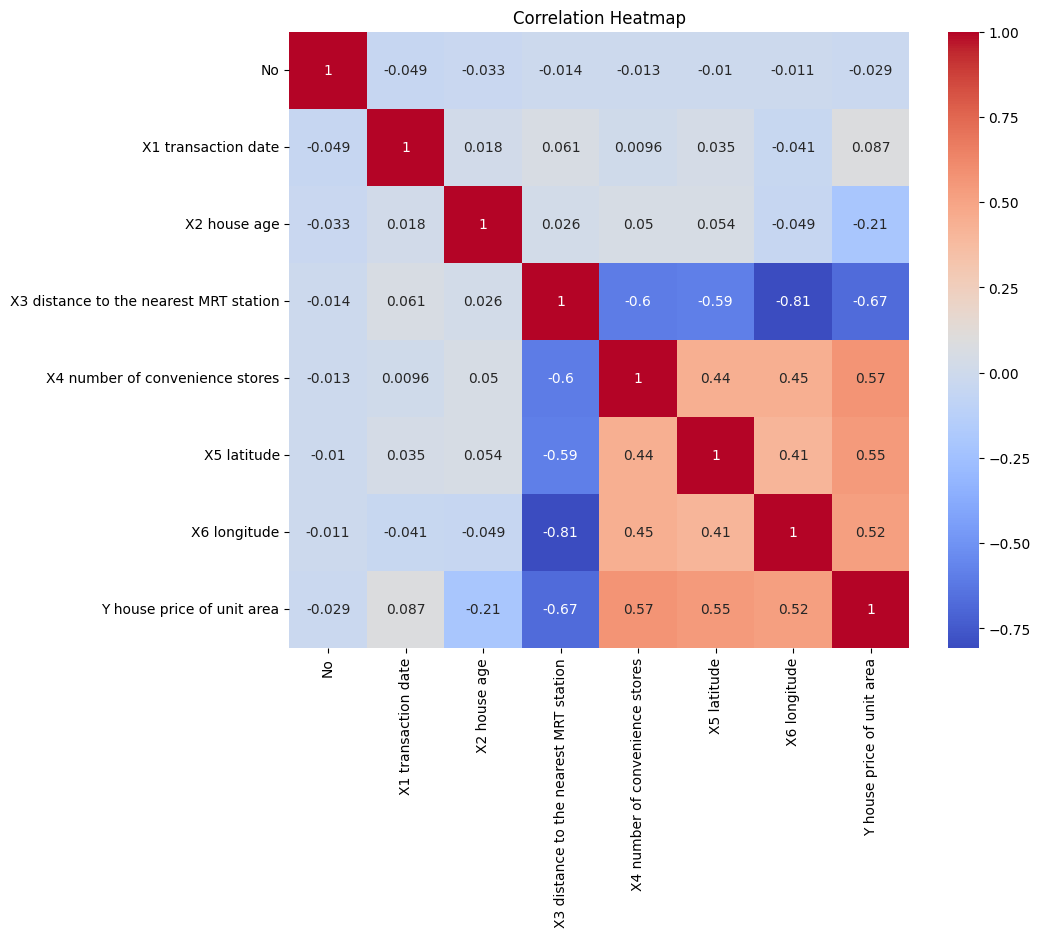

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


d. Check the correlations in the dataset

In [24]:
correlation_matrix = df.corr()
print(correlation_matrix["Y house price of unit area"].sort_values(ascending=False))


Y house price of unit area                1.000000
X4 number of convenience stores           0.571005
X5 latitude                               0.546307
X6 longitude                              0.523287
X1 transaction date                       0.087491
No                                       -0.028587
X2 house age                             -0.210567
X3 distance to the nearest MRT station   -0.673613
Name: Y house price of unit area, dtype: float64


e. Make features

In [25]:

X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
        'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']


f. Train test splitting

In [26]:

df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [27]:
X = df.drop('Y house price of unit area', axis =1)
y = df['X4 number of convenience stores']

In [ ]:
print("X=", X.shape, "\ny=", y.shape)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
X_train.shape

(331, 7)

In [30]:
X_test.shape

(83, 7)

g. Generating the model and train regression model

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

h. Check Coefficients, Intercept, R-Squared Value

In [32]:
# Coefficients
print("Coefficients:", model.coef_)

# Intercept
print("Intercept:", model.intercept_)

# R-Squared
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)


Coefficients: [ 5.21021540e-17 -2.34881559e-15 -1.12076011e-16 -2.60208521e-18
  1.00000000e+00 -1.58063112e-15  4.27826407e-15]
Intercept: 4.241940132487798e-12
R-squared (Train): 1.0
R-squared (Test): 1.0


I. Evaluate the model and give a proper view of performance

In [33]:
# Predict
y_pred = model.predict(X_test)

# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 6.521832853031385e-29
Root Mean Squared Error (RMSE): 8.075786557996308e-15


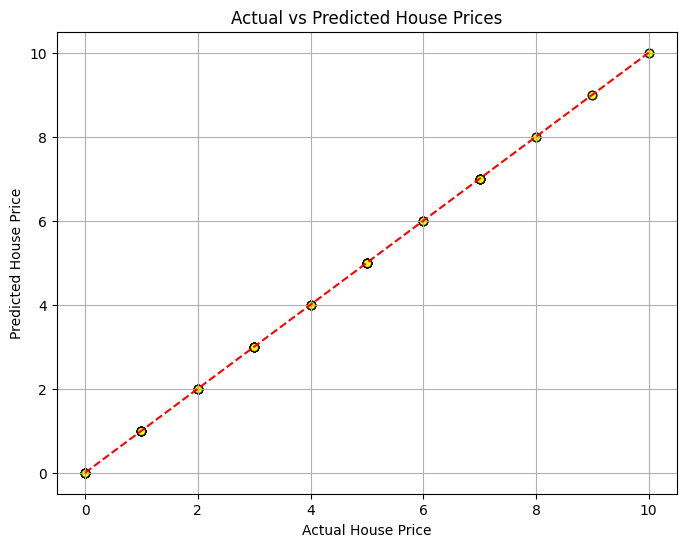

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='Yellow', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.show()